# Big Data for Biologists: Decoding Genomic Function- Class 7

## How do you quantify gene expression and visualize similarities and differences of gene expression profiles across cell types? Part I
 
##  Learning Objectives
***Students should be able to***
 <ol>
 <li> <a href=#GeneExpressionIntro>Quantify gene expression and understand units of gene expression levels</a></li>
 <li> <a href=#GeneExpressionIntro>Understand what a box plot is</a></li>
 <li> <a href=#GeneExpressionIntro>Visualize gene expression variation across cell types and individuals from the GTEx project</a></li>
 <li><a href=#RNASeqDataFormat>Recognize that data from an RNA-Seq experiment can be processed and stored in a format that can be read into Python</a></li>
 <li> <a href=#IDHeaderSep>Identify the separator and header in a data table</a></li> 
 <li><a href=#LoadTable> Load a data table in .csv or .tsv format into Python</a></li>
 <li> <a href=#DataTableDim>Get the dimensions of a data table in Python  </a></li>
 <li> <a href=#MetaData>Load RNA-Seq metadata for the physiological system of a cell type into Python</a></li> 
 <li> <a href=#Slicing>Slice a data table in Python to select a subset of rows or columns. </a></li> 
 <li> <a href=#Barplot>Make a bar plot from a data table using Python </a></li>
 <li> <a href=#BinaryIndex>Use binary indexing to select elements from a dataframe. </a></li>
 

## How do you quantify gene expression?

In [1]:
from IPython.display import HTML
HTML('<iframe src="https://drive.google.com/file/d/0B_ssVVyXv8ZSrnaseq_dataBNSkN5RFZDc00/preview" width="1000" height="480"></iframe>')

## How does gene expression change across cell types and individuals? 

Gene expression varies not only across cell types and tissues but also between healthy individuals and between health and diseased individuals.

The aim of the Genotype - Tissue Expression (GTEx) Project is to increase our understanding of how changes in our genes contribute to common human diseases, in order to improve health care for future generations.

Launched by the National Institutes of Health (NIH) in September 2010 (See: NIH launches Genotype-Tissue Expression project), GTEx has created a resource that researchers can use to study how inherited changes in genes lead to common diseases.  It has established a database and a tissue bank that can be used by many researchers around the world for future studies.

GTEx researchers are studying genes in different tissues obtained from many different people. Thus every donor's generous gift of tissues and medical information to the GTEx project makes possible research that will help improve our understanding of diseases, giving hope that we will find better ways to prevent, diagnose, treat and eventually cure these diseases in the future.

GTEx portal is at https://www.gtexportal.org/home/

In [2]:
HTML('<iframe src="https://drive.google.com/file/d/0B_ssVVyXv8ZSV2xYRnlHSDJMUTA/preview" width="1000" height="480"></iframe>')

Boxplots are a type of graph that is often used to visualize changes in gene expression, as in the GTEx examples below. We will use a python library called [plotnine](https://plotnine.readthedocs.io/en/stable/) to generate boxplots that illustrated changes in gene expression. 

Let's revisit the genes that we examined in the Washu Browser in the last tutorial. Click on the link next to each gene to navigate to the GTEx entry for the gene. 

* MYOD1 - muscle https://www.gtexportal.org/home/gene/MYOD1
* NEUROD1 - neurons https://www.gtexportal.org/home/gene/NEUROD1
* SPI1 - blood https://www.gtexportal.org/home/gene/SPI1
* HNF4A - Liver and related https://www.gtexportal.org/home/gene/HNF4A
* GTF2B - Ubiquitous gene https://www.gtexportal.org/home/gene/GTF2B


## How is data from an RNA-Seq experiment processed and stored in a format that can be read into Python? <a name='RNASeqDataFormat' />

We are now going to look at processed and normalized data from the ENCODE portal. 565 RNA-seq samples were collected across multiple tissues and cell types. We begin by looking at the number of sequence reads that align to each gene. The data is stored in a matrix format, with each row corresponding to a gene in the human genome and each column corresponding to an RNA-seq experiment. The values in the matrix are read counts -- specifically the number of reads that align to a given gene. We normalize the data to "counts per million". 
![alt text](../Images/7-gene_expression.png)

To start analyzing the data from the RNA-Seq experiment one of the first steps is reading the data into a program that can be used for the analysis. 

We'll be using Python and will need to first cover some general information about working with datatables. 

# Identify the separator and header in a data table  <a name='IDHeaderSep' />

Two common formats for data tables are comma separated values (**.csv**) files or tab separated values (**.tsv**) files.

In order to read a data table into a program, you often need to know the format of the file. One way to check the format is to look at the files in a text editor. In the figure below, you can see the differences between a file saved in .csv or .tsv format. 

Also, when you read a data table into Python (or R) you often need to specify which row of the file has the column labels. This row is referred to as a **header**.

Sometimes a file has extra lines above the header, so you may need to tell the program not to read that row since the extra lines may not have the same number of columns as the rest of the table and they can mess up the formatting. 
![alt text](../Images/6-Tables-CSV-TSV.png)


# Load a data table in .csv or .tsv format into Python <a name='LoadTable' />

To read our RNA-Seq data table into Python, we are going to be using the <i>pandas</i> package. 

<i>Pandas</i> adds functionality to working with data in Python. You can learn more about <i>pandas</i> at the following [link](http://pandas.pydata.org/). In particular, <i>pandas</i> introduces a variable type called dataframes which are a convient way of working with tables.

After we have imported the <i>pandas</i> package into Python, we can load a .csv or .tsv file with the read_csv or read_table command. 

The RNA-Seq data that we will be using is a .tsv file.

Note that the read command also asks for you to specify the row number for the header which in our case is the first line, denoted zero in Python. 

Take a look at reading in a file in the example below. 

In [3]:
# load the pandas package and define an abbreviation (or alias) 
import pandas as pd   

# read_table loads a tabular data file into python with tab as the default separator
# read_csv loads a tabular data file into python with comma as the deafault separator
# header gives the number of the row that will be used for column names

#Step 1: Read in the normalized data. 
rnaseq_data = pd.read_table(
     filepath_or_buffer='../datasets/RNAseq/rnaseq_normalized.tsv', 
     header=0,
     index_col=0)

Thought questions: 

* What would you change the code above to read in a .csv file?
* How would you need to change the code if your column names were in the third row? 

# How do I know how many genes and cell types I have in my data set (aka. Get the dimensions of a data table in Python)<a name='DataTableDim' />
  
Once you've read your data set into Python, there are just a couple of commands that you need to look at the size of your dataset. 


In [4]:
#Use the 'head' command to examine the structure of your data matrix. 
rnaseq_data.head()

,ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,ENCSR244ISQ.H9_Derived_Neuronal_Progenitor_Cultured_Cells.CSHL_Gingeras,ENCSR446RKD.Fetal_Intestine_Small.UW_Glass,ENCSR396GIH.Sigmoid_Colon.Stanford_Snyder,ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,...,ENCSR271DJJ.Pancreatic_Islets.UCSF_Costello,ENCSR000AED.GM12878_Lymphoblastoid_Cells.CSHL_Gingeras,ENCSR433GXV.hESC_Derived_CD56+_Mesoderm_Cultured_Cells.Harvard,ENCSR535VTR.HT1080_Fibrosarcoma_Cell_Line.CSHL_Gingeras,ENCSR000AEV.Bladder.CSHL_Gingeras,ENCSR314LXG.Karpas-422_B_Cell_Non-Hodgkin_Lymphoma_Cell_Line.CSHL_Gingeras,ENCSR642GSA.Primary_T_CD8+_naive_cells_from_peripheral_blood.UCSF_Costello,ENCSR880EGO.SJSA1_Osteosarcoma_Cell_Line.CSHL_Gingeras,ENCSR000AAT.Umbilical_Artery_Epithelial_Primary_Cells.CSHL_Gingeras,ENCSR000EYQ.HeLa-S3_Cervical_Carcinoma_Cell_Line.Caltech_Wold
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268.2,1.44,0.02,0.12,1.41,0.00,0.60,0.00,0.29,0.00,0.05,...,0.74,0.00,0.14,0.00,0.02,0.00,0.00,0.00,0.00,0.00
ENSG00000167578.12,46.45,1.85,19.95,9.46,2.67,2.25,5.04,13.60,59.20,1.16,...,21.47,44.18,13.72,7.31,0.31,4.15,30.42,8.26,0.76,3.38
ENSG00000270112.2,0.27,0.30,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,...,1.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000078237.4,45.71,1.25,28.88,7.91,0.09,29.66,16.45,7.11,10.03,0.03,...,5.18,26.87,14.56,17.76,0.38,4.58,7.07,7.47,2.86,9.02
ENSG00000263642.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [5]:
#Use the shape command to calculate the dimensions of your data matrix 
#shape[0] gives the number of rows, shape [1] gives the number of columns. 

num_genes=rnaseq_data.shape[0] 
num_samples=rnaseq_data.shape[1] 

#use the print command to print the variables you generated above 
print(num_genes)
print(num_samples)

57820
410


Thought questions:
How many genes were measured in this experiment?
How many samples were measured?

 # Load RNA-Seq metadata for the physiological system of a cell type into Python<a name='MetaData' />

In our example today, we want to compare cell types in different organ systems such as the Nervous system, Musculoskeletal system or Blood. 

We have a file that lists the System, Organ and Cell Type for each Sample in the RNA-Seq experiment from the last class. This separate file with information about the samples is referred to as **metadata**. 

The metadata is stored in a file called: '../datasets/RNAseq/rnaseq_metadata.txt'. 

Since the name of the metadata table does not tell you, how can you check if the file is in .csv or .tsv format? 

Using what you learned yesterday about reading detatables into Python, write the code to read in the baches file and to view the top of the file. 

In [6]:
#Step 2: Load the metadata file that provides metadata annotations for each sample 
#(hint: this will be very similar to the code we wrote to load the data table)

In [7]:
###BEGIN SOLUTION
metadata = pd.read_table(
     filepath_or_buffer='../datasets/RNAseq/rnaseq_metadata.txt', 
     header=0,
     index_col=0)
###END SOLUTION 

In [8]:
num_genes=metadata.shape[0] 
num_samples=metadata.shape[1] 

#use the print command to print the variables you generated above 
print(num_genes)
print(num_samples)
metadata.head()


410
3


,System,Organ,CellType
Sample,,,
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,Nervous,Brain,Neurosphere
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,Musculoskeletal,Muscle,Muscle
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,Embryonic,Trophoblast,ES.derived
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,Urinary,Kidney,Kidney
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,Blood,Blood,Leukemia


## Slice a data table in Python to select a subset of rows or columns. <a name='Slicing' />

To answer the question <i>"Do cell types from the same organ system have similar gene expression profiles?</i>, we are particularly interested in the column labeled System. 

Selecting part of a table is called slicing. It is very common in data analysis work to need to slice a table to select, for example, one column, one row or a set of rows and/or columns. 

Using the <i>pandas</i> package, there are a few ways that you can select rows and columns. Below is a table from the pandas [website](https://pandas.pydata.org/pandas-docs/stable/dsintro.html), that summarizes how you can select rows and columns.  For a more complete description and set of examples see this [link](https://pandas.pydata.org/pandas-docs/stable/indexing.html).

![alt_text](../Images/7-IndexingSelectingRowAndColumns.png)



In our example, let's look first at how we would select the System column.  

Row and column indices can be combined to select subsets of the dataframe. For example, we'd like to select the expression of gene "ENSG00000078237.4" from the sample "ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello". To do this, the syntax for row and column selection is combined to: 

In [9]:
#First, select the column of interest. Next, use the iloc command to select the row of interest. 
example_gene_expression=rnaseq_data["ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello"].loc["ENSG00000078237.4"]
print(example_gene_expression)

45.71


In [10]:
#or, we want to get the expression of the 10th gene for the sample of interest: 
example_gene_expression=rnaseq_data["ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello"].iloc[9]
print(example_gene_expression)

0.1


In [11]:
#Use the 'head' command to examine the structure of your data matrix. 
###BEGIN SOLUTION
metadata.head()
###END SOLUTION

,System,Organ,CellType
Sample,,,
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,Nervous,Brain,Neurosphere
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,Musculoskeletal,Muscle,Muscle
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,Embryonic,Trophoblast,ES.derived
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,Urinary,Kidney,Kidney
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,Blood,Blood,Leukemia


In [12]:
x=metadata['System']
print(x)

Sample
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello             Nervous
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass                                               Musculoskeletal
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson                        Embryonic
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass                                                      Urinary
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley                                                  Blood
ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley                                         Blood
ENCSR244ISQ.H9_Derived_Neuronal_Progenitor_Cultured_Cells.CSHL_Gingeras                       Nervous
ENCSR446RKD.Fetal_Intestine_Small.UW_Glass                                           Gastrointestinal
ENCSR396GIH.Sigmoid_Colon.Stanford_Snyder                                            Gastrointestinal
ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras                 

In [13]:
#Write the code to make a variable x with the Cell Type instead of the System. 
###BEGIN SOLUTION
###END SOLUTION

In [14]:
#Write the code to make a variable x with the first five rows of metadata 
#(remember to use Python zero-based numbering!). 
###BEGIN SOLUTION
###END SOLUTION

Notice that the last option in the table above indicates that you can specify the location with a Boolean vector. Boolean variables usually are variables that can take on two values, True or False. 

Using this syntax, we can write a criteria for the rows that we want to select. For example, if we want to select the rows from only the respiratory system we could specify the condition that System=='Respiratory'

In [15]:
metadata_subset=metadata.loc[metadata.System=='Respiratory']
print(metadata_subset)

                                                         System Organ  \
Sample                                                                  
ENCSR000AAN.Pulmonary_Artery_Smooth_Muscle_Prim...  Respiratory  Lung   
ENCSR499NEL.Fetal_Lung.UW_Glass                     Respiratory  Lung   
ENCSR917YHC.Lung.Stanford_Snyder                    Respiratory  Lung   
ENCSR074APH.Fetal_Lung.UW_Glass                     Respiratory  Lung   
ENCSR897KTO.Alveolus_Epithelial_Primary_Cells.C...  Respiratory  Lung   
ENCSR000CPM.NHLF_Lung_Fibroblast_Primary_Cells....  Respiratory  Lung   
ENCSR733MWN.Fetal_Lung.UW_Glass                     Respiratory  Lung   
ENCSR000AAS.Trachea_Smooth_Muscle_Primary_Cells...  Respiratory  Lung   
ENCSR000AAP.Pulmonary_Microvascular_Endothelial...  Respiratory  Lung   
ENCSR044JAQ.Fetal_Lung.UW_Glass                     Respiratory  Lung   
ENCSR861SOG.Fetal_Lung.UW_Glass                     Respiratory  Lung   
ENCSR000AAO.NHLF_Lung_Fibroblast_Primary_Cells.... 

In the example below, we are going to want to select multiple Systems. To do this, we can use the "|" operator 

In [16]:
metadata_subset=metadata.loc[(metadata.System=='Respiratory') | (metadata.System=='Embryonic')]
print(metadata_subset)

                                                         System        Organ  \
Sample                                                                         
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Culture...    Embryonic  Trophoblast   
ENCSR000AAN.Pulmonary_Artery_Smooth_Muscle_Prim...  Respiratory         Lung   
ENCSR499NEL.Fetal_Lung.UW_Glass                     Respiratory         Lung   
ENCSR593AMV.hESC_Derived_CD56._Ectoderm_Culture...    Embryonic     Ectoderm   
ENCSR663WGC.H1_Derived_Mesenchymal_Stem_Cells.U...    Embryonic   ES.derived   
ENCSR950PSB.H1_Cells.UCSF_Costello                    Embryonic          ESC   
ENCSR976JGI.H1_BMP4_Derived_Mesendoderm_Culture...    Embryonic   ES.derived   
ENCSR917YHC.Lung.Stanford_Snyder                    Respiratory         Lung   
ENCSR074APH.Fetal_Lung.UW_Glass                     Respiratory         Lung   
ENCSR897KTO.Alveolus_Epithelial_Primary_Cells.C...  Respiratory         Lung   
ENCSR282KJZ.ES.UCSF4_Cells.UCSF_Costello

A more compact way, however, to select a list of cell types is to define a variable for the list of cell types and then use the <i>pandas</i> isin function.  

In [17]:
#define the list of cell types
systems_subset=["Blood","Embryonic","Immune","Respiratory"]

#select the rows in metadata for which the System is one of the 
metadata_subset=metadata.loc[metadata['System'].isin(systems_subset)]

print(metadata_subset)

                                                         System        Organ  \
Sample                                                                         
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Culture...    Embryonic  Trophoblast   
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley            Blood        Blood   
ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_...        Blood        Blood   
ENCSR000CUA.Primary_hematopoietic_stem_cells.CS...        Blood        Blood   
ENCSR000AAN.Pulmonary_Artery_Smooth_Muscle_Prim...  Respiratory         Lung   
ENCSR463JBR.Primary_T_CD4._cells_from_periphera...        Blood        Blood   
ENCSR265NZF.Fetal_Spleen.UW_Glass                        Immune       Spleen   
ENCSR069CMT.Fetal_Thymus.UW_Glass                        Immune       Thymus   
ENCSR499NEL.Fetal_Lung.UW_Glass                     Respiratory         Lung   
ENCSR593AMV.hESC_Derived_CD56._Ectoderm_Culture...    Embryonic     Ectoderm   
ENCSR663WGC.H1_Derived_Mesenchymal_Stem_

## Make a bar plot from a data table using Python<a name='Barplot' />

Now that we know how to select specific columns from a table, we are going to make a bar plot to look at the number of samples in each of the organ systems. 

Specifically, since we have limited computational resources we are going to focus on only four systems today. We want to ensure that we are selecting systems that have a sufficient number of samples. 

There are several different packages that can be used to make plots in Python. We will be using the [ggplot](http://ggplot.yhathq.com/) package. 


In [18]:
from plotnine import * 

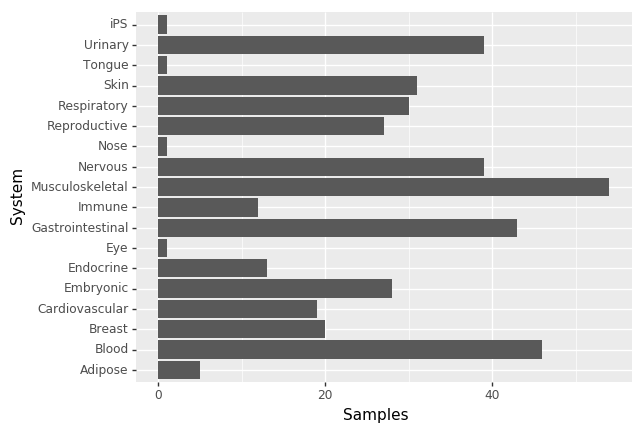

<ggplot: (8734995549269)>

In [35]:
x=metadata['System']
qplot(x=x,
      geom="bar",
      xlab="System",
      ylab="Samples")+coord_flip()

We will now transpose the data frame. Transposition is an operation that flips the rows and columns in a matrix, like in the example below. 

![alt_text](../Images/7-transpose.png)

Currently our features (genes) are along the row axis, while sample names are along the column axis. Transposing the matrix will place the genes along the column axis and the sample names along the row axis. 

In [20]:
transposed_rnaseq_data=rnaseq_data.transpose()
transposed_rnaseq_data.head()

Gene,ENSG00000242268.2,ENSG00000167578.12,ENSG00000270112.2,ENSG00000078237.4,ENSG00000263642.1,ENSG00000225275.4,ENSG00000269416.1,ENSG00000268332.1,ENSG00000060642.6,ENSG00000231981.3,...,ENSG00000089177.13,ENSG00000124214.15,ENSG00000267117.1,ENSG00000148943.7,ENSG00000273233.1,ENSG00000265520.1,ENSG00000231119.2,ENSG00000105063.14,ENSG00000123685.4,ENSG00000181518.2
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,1.44,46.45,0.27,45.71,0.0,0.0,8.71,0.0,6.99,0.10,...,4.15,75.70,0.00,10.73,0.32,0.0,0.21,55.10,2.47,0.00
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,0.02,1.85,0.30,1.25,0.0,0.0,0.13,0.0,1.42,0.34,...,7.65,8.20,0.00,3.38,0.05,0.0,0.01,3.45,0.39,0.02
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,0.12,19.95,0.00,28.88,0.0,0.0,0.94,0.0,4.48,0.04,...,7.83,67.11,0.00,11.65,0.14,0.0,0.03,35.39,0.99,0.00
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,1.41,9.46,0.00,7.91,0.0,0.0,5.42,0.0,12.92,0.00,...,14.04,92.10,0.21,20.00,0.00,0.0,0.27,34.78,0.63,0.00
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,0.00,2.67,0.00,0.09,0.0,0.0,0.00,0.0,3.32,0.22,...,2.32,13.98,0.00,11.45,0.00,0.0,0.03,10.25,0.11,0.00


![alt_text](../Images/7_merging_merge_on_key.png)

In [21]:
#merge the metadata and gene expression data into a single data frame 

merged_df=pd.merge(transposed_rnaseq_data, metadata, left_index=True,right_index=True)
merged_df.head()

,ENSG00000242268.2,ENSG00000167578.12,ENSG00000270112.2,ENSG00000078237.4,ENSG00000263642.1,ENSG00000225275.4,ENSG00000269416.1,ENSG00000268332.1,ENSG00000060642.6,ENSG00000231981.3,...,ENSG00000148943.7,ENSG00000273233.1,ENSG00000265520.1,ENSG00000231119.2,ENSG00000105063.14,ENSG00000123685.4,ENSG00000181518.2,System,Organ,CellType
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,1.44,46.45,0.27,45.71,0.0,0.0,8.71,0.0,6.99,0.10,...,10.73,0.32,0.0,0.21,55.10,2.47,0.00,Nervous,Brain,Neurosphere
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,0.02,1.85,0.30,1.25,0.0,0.0,0.13,0.0,1.42,0.34,...,3.38,0.05,0.0,0.01,3.45,0.39,0.02,Musculoskeletal,Muscle,Muscle
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,0.12,19.95,0.00,28.88,0.0,0.0,0.94,0.0,4.48,0.04,...,11.65,0.14,0.0,0.03,35.39,0.99,0.00,Embryonic,Trophoblast,ES.derived
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,1.41,9.46,0.00,7.91,0.0,0.0,5.42,0.0,12.92,0.00,...,20.00,0.00,0.0,0.27,34.78,0.63,0.00,Urinary,Kidney,Kidney
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,0.00,2.67,0.00,0.09,0.0,0.0,0.00,0.0,3.32,0.22,...,11.45,0.00,0.0,0.03,10.25,0.11,0.00,Blood,Blood,Leukemia


In [22]:
# We will focus our analysis on 5 of the anatomical structures and check for differential gene expression among them.  


#Pick out the samples in the merged dataframe that contain the samples from the systems of interest 
systems_subset=["Blood","Embryonic","Immune","Respiratory"]
rnaseq_data_subset=merged_df.loc[merged_df['System'].isin(systems_subset)]

#Check row & column numbers in rnaseq_data_subset 
print(rnaseq_data_subset.shape[0])#prints number of rows -- this is the gene axis 
print(rnaseq_data_subset.shape[1])#prints number of columns 


94
57823


Yesterday the size of the matrix was:

55667 <br>
410 

Thought question: What is the difference between the rnaseq_data_subset matrix that we just made and the original rnaseq_data matrix?

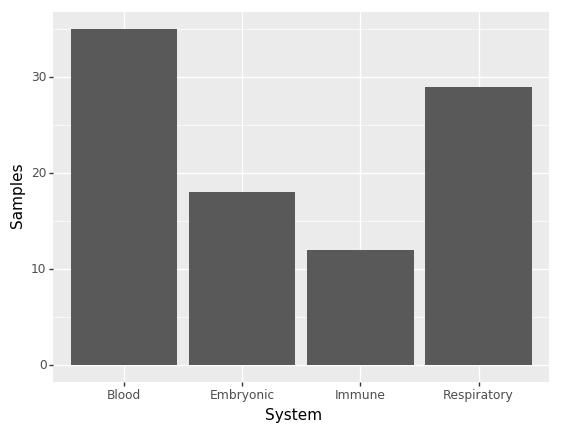

<ggplot: (-9223363301859203447)>

In [25]:
#Now, we create a barplot with just our 4 organ systems of interest 
#(ggplot(rnaseq_data_subset, aes(x='System'))
# + geom_bar()
# +coord_flip()
#)
x=rnaseq_data_subset['System']
qplot(x=x,
      geom="bar",
      xlab="System",
      ylab="Samples")

In [46]:
#Step 3 : We are interested in genes that are differentially expressed across samples, so we can exclude genes that have 0 TPM
#in all samples -- these are not of interest. use the sum command to find such genes 

#Selects rows in the datafile subset for which the sum of the columns is not = to zero. 
rnaseq_data_subset=rnaseq_data_subset[rnaseq_data_subset.sum(axis=1)!=0]


###  Programming tip -- Using binary indexing to extract elements in a matrix. 

In the code above we needed to select the rows in pca_rnaseq_data for each of the four organ systems. To do this, we executued the line of code: 

```
rnaseq_data_subset=merged_df.loc[merged_df['System'].isin(systems_subset)]
```
Let's break down what this line of code is doing. 
First, we find all positions in `merged_df["System"]` that have a specific name. For example:  

In [47]:
name='Blood'
print(name)
merged_df['System']==name

Blood


ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello             False
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass                                                       False
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson                          False
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass                                                      False
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley                                                 True
ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley                                        True
ENCSR244ISQ.H9_Derived_Neuronal_Progenitor_Cultured_Cells.CSHL_Gingeras                       False
ENCSR446RKD.Fetal_Intestine_Small.UW_Glass                                                    False
ENCSR396GIH.Sigmoid_Colon.Stanford_Snyder                                                     False
ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras                                     True


Note that `merged_df['System']==name` returns a value of "True" or "False" at each position in the` merged_df['System']` array. This is referred to as binary indexing. 

Next, we identify the rows with a value of "True", and select them from `merged_df.loc`. 
This is done with the command: 

In [48]:
merged_df.loc[merged_df["System"]==name]

,ENSG00000242268.2,ENSG00000167578.12,ENSG00000270112.2,ENSG00000078237.4,ENSG00000263642.1,ENSG00000225275.4,ENSG00000269416.1,ENSG00000268332.1,ENSG00000060642.6,ENSG00000231981.3,...,ENSG00000148943.7,ENSG00000273233.1,ENSG00000265520.1,ENSG00000231119.2,ENSG00000105063.14,ENSG00000123685.4,ENSG00000181518.2,System,Organ,CellType
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,0.00,2.67,0.00,0.09,0.0,0.0,0.00,0.0,3.32,0.22,...,11.45,0.00,0.0,0.03,10.25,0.11,0.0,Blood,Blood,Leukemia
ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,0.60,2.25,0.00,29.66,0.0,0.0,0.04,0.0,7.60,0.00,...,7.52,0.00,0.0,0.04,10.64,4.88,0.0,Blood,Blood,Lymphoblastoid
ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,0.05,1.16,0.00,0.03,0.0,0.0,0.00,0.0,1.60,0.00,...,0.31,0.00,0.0,0.00,10.83,0.11,0.0,Blood,Blood,HSC
ENCSR357XTU.Primary_Natural_Killer_cells_from_peripheral_blood.FHCRC_Heimfeld,0.00,29.42,0.00,5.45,0.0,0.0,0.00,0.0,12.00,0.59,...,10.66,0.09,0.0,0.01,32.82,1.92,0.0,Blood,Blood,B.cell
ENCSR409JSP.Primary_mononuclear_cells_from_peripheral_blood.UCSF_Costello,0.00,29.04,0.00,14.60,0.0,0.0,0.00,0.0,1.86,0.23,...,4.88,0.00,0.0,0.00,48.63,4.38,0.0,Blood,Blood,T.cell
ENCSR000AEN.K562_Leukemia_Cells.UConn_Graveley,0.00,1.42,0.00,0.22,0.0,0.0,0.00,0.0,3.07,0.15,...,14.57,0.09,0.0,0.05,7.73,0.31,0.0,Blood,Blood,Leukemia
ENCSR000AEC.GM12878_Lymphoblastoid_Cells.CSHL_Gingeras,0.00,5.98,0.00,4.51,0.0,0.0,0.00,0.0,2.37,0.00,...,2.43,0.00,0.0,0.02,14.73,8.76,0.0,Blood,Blood,Lymphoblastoid
ENCSR830HIN.Primary_hematopoietic_stem_cells.FHCRC_Heimfeld,5.64,21.43,0.00,1.24,0.0,0.0,0.00,0.0,14.03,0.00,...,12.69,0.40,0.0,0.24,78.63,2.62,0.0,Blood,Blood,HSC
ENCSR001ODS.Primary_mononuclear_cells_from_peripheral_blood.UCSF_Costello,0.00,44.30,0.00,15.90,0.0,0.0,0.20,0.0,3.65,0.16,...,7.97,0.00,0.0,0.20,128.89,2.59,0.0,Blood,Blood,T.cell
ENCSRMAR043.Primary_T_helper_cells_from_peripheral_blood.Broad_Bernstein,0.04,17.59,0.00,10.74,0.0,0.0,0.00,0.0,2.59,0.12,...,9.39,0.09,0.0,0.03,93.81,0.32,0.0,Blood,Blood,T.cell


This has allowed us to create positional indices from the binary True/False indices. 